In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageChops

In [2]:
train = pd.read_csv('/Users/kaivuxu/Downloads/mnist_train.csv')
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
rownum=6875

In [4]:
if rownum > -1 and rownum < 60000:
    pixels = train.iloc[rownum][1:].values.reshape(28,28)
    array = np.array(pixels,dtype=np.uint8)
    img = Image.fromarray(array)
else:
    print('wrong')

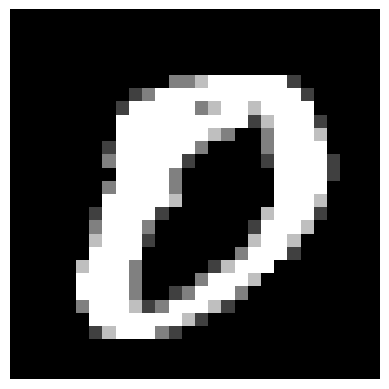

In [5]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
gray_img = img.convert('L')

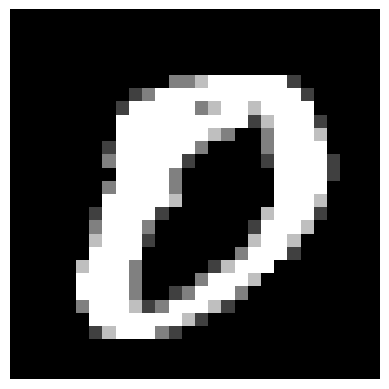

In [7]:
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

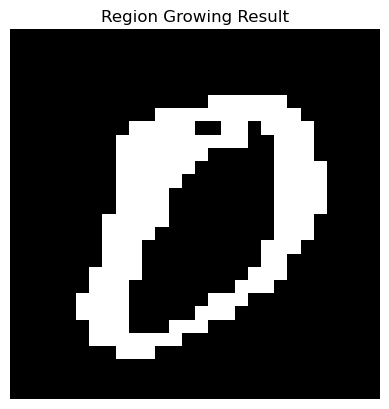

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and prepare the image
 # Convert to grayscale
img_array = np.array(img)

# Ensure the seed is within the valid image bounds
height, width = img_array.shape
seed = (10, 10)  # A valid seed point (within bounds)
threshold = 20  # Intensity difference threshold for growing

# Initialize a binary image for the output
region_grown = np.zeros_like(img_array, dtype=np.uint8)

# Region growing function
def region_growing(img_array, seed, threshold):
    # Stack to hold pixels to check
    stack = [seed]
    mean_intensity = img_array[seed]  # Start with seed intensity
    region_grown = np.zeros_like(img_array, dtype=np.uint8)
    
    while stack:
        x, y = stack.pop()
        if region_grown[x, y] == 0:  # If not already part of region
            region_grown[x, y] = 255  # Mark pixel as part of region
            
            # Get neighbors (8-connected neighborhood)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
                nx, ny = x + dx, y + dy
                if 0 <= nx < img_array.shape[0] and 0 <= ny < img_array.shape[1]:
                    # Check if the pixel intensity difference is below the threshold
                    if region_grown[nx, ny] == 0 and abs(int(img_array[nx, ny]) - mean_intensity) < threshold:
                        stack.append((nx, ny))  # Add pixel to stack for further checking
    return region_grown

# Perform region growing
region_grown_img = region_growing(img_array, seed, threshold)

# Display the result
plt.imshow(region_grown_img, cmap='gray')
plt.title("Region Growing Result")
plt.axis('off')
plt.show()


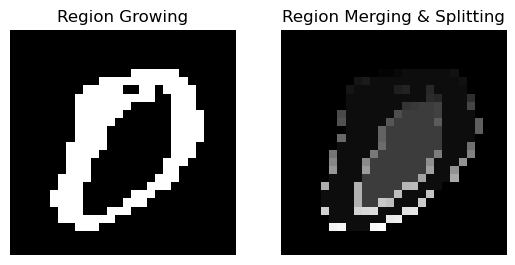

In [11]:
# Parameters for region merging and splitting
split_threshold = 30  # Intensity difference threshold for splitting
merge_threshold = 20  # Intensity difference threshold for merging

# Split the image into smaller regions (using simple intensity thresholding)
def region_split(img_array, split_threshold):
    regions = []
    visited = np.zeros_like(img_array, dtype=bool)
    
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            if not visited[i, j]:
                # Start new region if not visited
                region = []
                stack = [(i, j)]
                while stack:
                    x, y = stack.pop()
                    if visited[x, y]:
                        continue
                    visited[x, y] = True
                    region.append((x, y))
                    
                    # Check 8-connected neighbors
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
                        nx, ny = x + dx, y + dy
                        if 0 <= nx < img_array.shape[0] and 0 <= ny < img_array.shape[1]:
                            # Add neighboring pixels if they satisfy the split condition
                            if abs(int(img_array[x, y]) - int(img_array[nx, ny])) < split_threshold:
                                stack.append((nx, ny))
                regions.append(region)
    return regions

# Merge regions if their intensity difference is within the merge threshold
def region_merge(img_array, regions, merge_threshold):
    merged = np.zeros_like(img_array, dtype=np.uint8)
    region_id = 0
    
    for region in regions:
        for x, y in region:
            merged[x, y] = region_id + 1  # Assign a unique region ID
        region_id += 1
        
    # Merge neighboring regions
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            if i < img_array.shape[0] - 1 and abs(int(img_array[i, j]) - int(img_array[i + 1, j])) < merge_threshold:
                merged[i, j] = merged[i + 1, j]  # Merge regions if intensity difference is below threshold
    return merged

# Split the image into regions
regions = region_split(img_array, split_threshold)

# Merge regions
merged_image = region_merge(img_array, regions, merge_threshold)

# Display the split and merged result
plt.subplot(1, 2, 1)
plt.imshow(region_grown_img, cmap='gray')
plt.title("Region Growing")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(merged_image, cmap='gray')
plt.title("Region Merging & Splitting")
plt.axis('off')

plt.show()
